In [1]:
%load_ext autoreload
%autoreload 2

from avro.datafile import DataFileReader
from avro.io import DatumReader
import json
import csv
import os

In [5]:
avro_file_path = "2025-03-12/004-3YK9K1J2D2/raw_data/v6/1-1-004_1741787532.avro"
output_dir = "./"
## Read Avro file
reader = DataFileReader(open(avro_file_path,
"rb"), DatumReader())
schema = json.loads(reader.meta.get('avro.schema').decode('utf-8'))
data= next(reader)
## Print the Avro schema
print(schema)
## Export sensors data to csv files
# Accelerometer
acc = data["rawData"]["accelerometer"]
timestamp = [round(acc["timestampStart"] + i * (1e6 / acc["samplingFrequency"]))
for i in range(len(acc["x"]))]

# Convert ADC counts in g
delta_physical = acc["imuParams"]["physicalMax"] - acc["imuParams"]["physicalMin"]
delta_digital = acc["imuParams"]["digitalMax"] - acc["imuParams"]["digitalMin"]
x_g = [val * delta_physical / delta_digital for val in acc["x"]]
y_g = [val * delta_physical / delta_digital for val in acc["y"]]
z_g = [val * delta_physical / delta_digital for val in acc["z"]]

with open(os.path.join(output_dir,'accelerometer.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["unix_timestamp", "x", "y", "z"])
    writer.writerows([[ts, x, y, z] for ts, x, y, z in zip(timestamp, x_g, y_g, z_g)])
    
# Gyroscope
gyro = data["rawData"]["gyroscope"]
timestamp = [round(gyro["timestampStart"] + i * (1e6 / gyro["samplingFrequency"])) for i in range(len(gyro["x"]))]
with open(os.path.join(output_dir,'gyroscope.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["unix_timestamp", "x", "y", "z"])
    writer.writerows([[ts, x, y, z] for ts, x, y, z in zip(timestamp, gyro["x"], gyro["y"], gyro["z"])])
    
# Eda
eda = data["rawData"]["eda"]
timestamp = [round(eda["timestampStart"] + i * (1e6 / eda["samplingFrequency"])) for i in range(len(eda["values"]))]
with open(os.path.join(output_dir, 'eda.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["unix_timestamp", "eda"])
    writer.writerows([[ts, eda] for ts, eda in zip(timestamp, eda["values"])])
# Temperature
tmp = data["rawData"]["temperature"]
timestamp = [round(tmp["timestampStart"] + i * (1e6 / tmp["samplingFrequency"]))
for i in range(len(tmp["values"]))]
with open(os.path.join(output_dir,
'temperature.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["unix_timestamp", "temperature"])
    writer.writerows([[ts, tmp] for ts, tmp in zip(timestamp, tmp["values"])])
# Tags
tags = data["rawData"]["tags"]
with open(os.path.join(output_dir,
'tags.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["tags_timestamp"])
    writer.writerows([[tag] for tag in tags["tagsTimeMicros"]])
# BVP
bvp = data["rawData"]["bvp"]
timestamp = [round(bvp["timestampStart"] + i * (1e6 / bvp["samplingFrequency"]))
for i in range(len(bvp["values"]))]
with open(os.path.join(output_dir,
'bvp.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["unix_timestamp", "bvp"])
    writer.writerows([[ts, bvp] for ts, bvp in zip(timestamp, bvp["values"])])
# Systolic peaks
sps = data["rawData"]["systolicPeaks"]
with open(os.path.join(output_dir,
'systolic_peaks.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["systolic_peak_timestamp"])
    writer.writerows([[sp] for sp in sps["peaksTimeNanos"]])
# Steps
steps = data["rawData"]["steps"]
timestamp = [round(steps["timestampStart"] + i * (1e6 / steps["samplingFrequency"]))
for i in range(len(steps["values"]))]
with open(os.path.join(output_dir,
'steps.csv'), 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["unix_timestamp", "steps"])
    writer.writerows([[ts, step] for ts, step in zip(timestamp, steps["values"])])

{'doc': 'Session file for Empatica devices.', 'fields': [{'doc': 'Version of the AVRO file schema.', 'name': 'schemaVersion', 'type': {'fields': [{'doc': 'Major version.', 'name': 'major', 'type': 'int'}, {'doc': 'Minor version.', 'name': 'minor', 'type': 'int'}, {'doc': 'Patch version.', 'name': 'patch', 'type': 'int'}], 'name': 'Version', 'type': 'record'}}, {'doc': 'Version of the device firmware.', 'name': 'fwVersion', 'type': 'empatica.format.avro.Version'}, {'doc': 'Version of the device hardware.', 'name': 'hwVersion', 'type': 'empatica.format.avro.Version'}, {'doc': 'Version of the processing algorithm.', 'name': 'algoVersion', 'type': 'empatica.format.avro.Version'}, {'default': 0, 'doc': 'Delta [s] from UTC [s] time at the location of the participant.', 'name': 'timezone', 'type': 'int'}, {'doc': 'Information of the participant enrolled.', 'name': 'enrollment', 'type': {'fields': [{'doc': 'Participant identifier.', 'name': 'participantID', 'type': 'string'}, {'doc': 'Site ide

In [ ]:
def extract_avro_to():
    pass

In [ ]:
import os
import json
from avro.datafile import DataFileReader
from avro.io import DatumReader
import pandas as pd
from functools import reduce

# Define subject IDs
subject_ids = [f"{i:03d}" for i in range(3, 10)]  # ['003', '004', ..., '009']

for subject_id in subject_ids:
    base_dir = os.path.join('2025-03-12', subject_id+"-3YK9K1J2D2", 'raw_data', 'v6')
    output_csv = f"{subject_id}.csv"
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} not found. Skipping subject {subject_id}.")
        continue
    
    avro_files = [f for f in os.listdir(base_dir) if f.endswith('.avro')]
    if not avro_files:
        print(f"No .avro files found in {base_dir}. Skipping subject {subject_id}.")
        continue

    # Initialize DataFrames for each sensor
    sensor_dfs = {
        'accelerometer': [],
        'gyroscope': [],
        'eda': [],
        'temperature': [],
        'tags': [],
        'bvp': [],
        'systolic_peaks': [],
        'steps': []
    }

    for avro_file in avro_files:
        avro_path = os.path.join(base_dir, avro_file)
        try:
            with DataFileReader(open(avro_path, "rb"), DatumReader()) as reader:
                data = next(reader)  # Assuming one data record per file

                # Process Accelerometer
                acc = data["rawData"]["accelerometer"]
                sf = acc["samplingFrequency"]
                delta_phys = acc["imuParams"]["physicalMax"] - acc["imuParams"]["physicalMin"]
                delta_dig = acc["imuParams"]["digitalMax"] - acc["imuParams"]["digitalMin"]
                x_g = [x * delta_phys / delta_dig for x in acc["x"]]
                y_g = [y * delta_phys / delta_dig for y in acc["y"]]
                z_g = [z * delta_phys / delta_dig for z in acc["z"]]
                timestamps = [round(acc["timestampStart"] + i * (1e6 / sf)) for i in range(len(x_g))]
                sensor_dfs['accelerometer'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'accelerometer_x': x_g,
                    'accelerometer_y': y_g,
                    'accelerometer_z': z_g
                }))

                # Process Gyroscope
                gyro = data["rawData"]["gyroscope"]
                sf = gyro["samplingFrequency"]
                timestamps = [round(gyro["timestampStart"] + i * (1e6 / sf)) for i in range(len(gyro["x"]))]
                sensor_dfs['gyroscope'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'gyroscope_x': gyro["x"],
                    'gyroscope_y': gyro["y"],
                    'gyroscope_z': gyro["z"]
                }))

                # Process EDA
                eda = data["rawData"]["eda"]
                sf = eda["samplingFrequency"]
                timestamps = [round(eda["timestampStart"] + i * (1e6 / sf)) for i in range(len(eda["values"]))]
                sensor_dfs['eda'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'eda': eda["values"]
                }))

                # Process Temperature
                temp = data["rawData"]["temperature"]
                sf = temp["samplingFrequency"]
                timestamps = [round(temp["timestampStart"] + i * (1e6 / sf)) for i in range(len(temp["values"]))]
                sensor_dfs['temperature'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'temperature': temp["values"]
                }))

                # Process Tags
                tags = data["rawData"]["tags"]
                if tags["tagsTimeMicros"]:
                    sensor_dfs['tags'].append(pd.DataFrame({
                        'timestamp': tags["tagsTimeMicros"],
                        'tag': 1  # Mark presence of tag
                    }))

                # Process BVP
                bvp = data["rawData"]["bvp"]
                sf = bvp["samplingFrequency"]
                timestamps = [round(bvp["timestampStart"] + i * (1e6 / sf)) for i in range(len(bvp["values"]))]
                sensor_dfs['bvp'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'bvp': bvp["values"]
                }))

                # Process Systolic Peaks (convert nanoseconds to microseconds)
                sps = data["rawData"]["systolicPeaks"]
                if sps["peaksTimeNanos"]:
                    timestamps = [ts // 1000 for ts in sps["peaksTimeNanos"]]  # Convert to microseconds
                    sensor_dfs['systolic_peaks'].append(pd.DataFrame({
                        'timestamp': timestamps,
                        'systolic_peak': 1  # Mark presence of peak
                    }))

                # Process Steps
                steps = data["rawData"]["steps"]
                sf = steps["samplingFrequency"]
                timestamps = [round(steps["timestampStart"] + i * (1e6 / sf)) for i in range(len(steps["values"]))]
                sensor_dfs['steps'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'steps': steps["values"]
                }))

        except Exception as e:
            print(f"Error processing {avro_path}: {e}")
            continue

    # Concatenate all DataFrames for each sensor
    dfs_to_merge = []
    for sensor in sensor_dfs:
        if sensor_dfs[sensor]:
            concatenated_df = pd.concat(sensor_dfs[sensor], ignore_index=True)
            dfs_to_merge.append(concatenated_df)

    if not dfs_to_merge:
        print(f"No data collected for subject {subject_id}.")
        continue

    # Merge all sensor DataFrames on 'timestamp'
    merged_df = reduce(
        lambda left, right: pd.merge(left, right, on='timestamp', how='outer'),
        dfs_to_merge
    )

    # Sort by timestamp and save
    merged_df.sort_values('timestamp', inplace=True)
    merged_df.to_csv(output_csv, index=False)

print("Processing completed.")

Processing completed.


In [44]:
# processed signals
import os
import json
from avro.datafile import DataFileReader
from avro.io import DatumReader
import pandas as pd
from functools import reduce

# Define subject IDs
subject_ids = [f"{i:03d}" for i in range(3, 10)]  # ['003', '004', ..., '009']

for subject_id in subject_ids:
    base_dir = os.path.join('2025-03-12', subject_id+"-3YK9K1J2D2", 'raw_data', 'v6')
    output_csv = f"{subject_id}.csv"
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} not found. Skipping subject {subject_id}.")
        continue
    
    avro_files = [f for f in os.listdir(base_dir) if f.endswith('.avro')]
    if not avro_files:
        print(f"No .avro files found in {base_dir}. Skipping subject {subject_id}.")
        continue

    # Initialize DataFrames for each sensor
    sensor_dfs = {
        'accelerometer': [],
        'eda': [],
        'temperature': [],
        'bvp': [],
        'systolic_peaks': [],
    }

    for avro_file in avro_files:
        avro_path = os.path.join(base_dir, avro_file)
        try:
            with DataFileReader(open(avro_path, "rb"), DatumReader()) as reader:
                data = next(reader)  # Assuming one data record per file

                # Process Accelerometer
                acc = data["rawData"]["accelerometer"]
                sf = acc["samplingFrequency"]
                delta_phys = acc["imuParams"]["physicalMax"] - acc["imuParams"]["physicalMin"]
                delta_dig = acc["imuParams"]["digitalMax"] - acc["imuParams"]["digitalMin"]
                x_g = [x * delta_phys / delta_dig for x in acc["x"]]
                y_g = [y * delta_phys / delta_dig for y in acc["y"]]
                z_g = [z * delta_phys / delta_dig for z in acc["z"]]
                timestamps = [round(acc["timestampStart"] + i * (1e6 / sf)) for i in range(len(x_g))]
                sensor_dfs['accelerometer'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'accelerometer_x': x_g,
                    'accelerometer_y': y_g,
                    'accelerometer_z': z_g
                }))

                # Process EDA
                eda = data["rawData"]["eda"]
                sf = eda["samplingFrequency"]
                timestamps = [round(eda["timestampStart"] + i * (1e6 / sf)) for i in range(len(eda["values"]))]
                sensor_dfs['eda'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'eda': eda["values"]
                }))

                # Process Temperature
                temp = data["rawData"]["temperature"]
                sf = temp["samplingFrequency"]
                timestamps = [round(temp["timestampStart"] + i * (1e6 / sf)) for i in range(len(temp["values"]))]
                sensor_dfs['temperature'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'temperature': temp["values"]
                }))

                # Process BVP
                bvp = data["rawData"]["bvp"]
                sf = bvp["samplingFrequency"]
                timestamps = [round(bvp["timestampStart"] + i * (1e6 / sf)) for i in range(len(bvp["values"]))]
                sensor_dfs['bvp'].append(pd.DataFrame({
                    'timestamp': timestamps,
                    'bvp': bvp["values"]
                }))

                # Process Systolic Peaks (convert nanoseconds to microseconds)
                sps = data["rawData"]["systolicPeaks"]
                if sps["peaksTimeNanos"]:
                    timestamps = [ts // 1000 for ts in sps["peaksTimeNanos"]]  # Convert to microseconds
                    sensor_dfs['systolic_peaks'].append(pd.DataFrame({
                        'timestamp': timestamps,
                        'systolic_peak': 1  # Mark presence of peak
                    }))

        except Exception as e:
            print(f"Error processing {avro_path}: {e}")
            continue

    # Concatenate all DataFrames for each sensor
    dfs_to_merge = []
    for sensor in sensor_dfs:
        if sensor_dfs[sensor]:
            concatenated_df = pd.concat(sensor_dfs[sensor], ignore_index=True)
            dfs_to_merge.append(concatenated_df)

    if not dfs_to_merge:
        print(f"No data collected for subject {subject_id}.")
        continue

    # Merge all sensor DataFrames on 'timestamp'
    merged_df = reduce(
        lambda left, right: pd.merge(left, right, on='timestamp', how='outer'),
        dfs_to_merge
    )

    # Sort by timestamp and save
    merged_df.sort_values('timestamp', inplace=True)
    merged_df.to_csv(output_csv, index=False,)
    #merged_df.to_feather(f"{subject_id}.feather",)

print("Processing completed.")

Processing completed.


In [11]:
#merged_df['timestamp'] -= merged_df['timestamp'][0]
merged_df['timestamp'] = merged_df['timestamp']//1000
merged_df

,timestamp,accelerometer_x,accelerometer_y,accelerometer_z,eda,temperature,bvp,systolic_peak
0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,3,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2,15,-0.032227,-0.213379,1.156738,NaN,NaN,NaN,NaN
3,19,NaN,NaN,NaN,NaN,NaN,-0.000007,NaN
4,31,0.107910,-0.305176,1.219238,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
446132,3658403,0.079102,0.939941,0.184082,NaN,NaN,NaN,NaN
446133,3658419,0.070801,0.959473,0.214844,NaN,NaN,NaN,NaN
446134,3658434,0.075195,0.989258,0.226562,NaN,NaN,NaN,NaN
446135,3658450,NaN,NaN,NaN,NaN,31.015625,NaN,NaN


In [13]:
merged_df.to_csv('sample.csv', index=False,)

In [20]:
merged_df.iloc[:1000,4:]

,eda,temperature,bvp,systolic_peak
0,NaN,NaN,NaN,1.0
1,NaN,NaN,0.000000,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,-0.000007,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,-0.014183,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,-0.012318,NaN


<Axes: xlabel='timestamp', ylabel='bvp'>

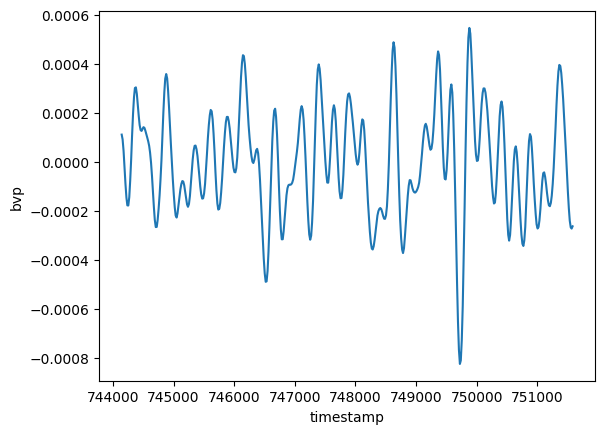

In [43]:
import seaborn as sns
sns.lineplot(merged_df.iloc[100000:101000,:],x='timestamp', y='bvp',)
#sns.lineplot(merged_df.iloc[100000:101000,:],x='timestamp', y='eda',)